# Image Classification (CIFAR10 dataset) by ANN vs CNN

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
#datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 40s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
(x_train,y_train),(x_test, y_test)= datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


training samples 50k;each sample is 32*32 imaage ;3 for RGB channel

In [6]:
y_train = y_train.reshape(-1,) #-1 for remaining 1st dimension and blank for flattening
y_train[:5]   #2d to 1d

array([6, 9, 9, 4, 1], dtype=uint8)

# Plotting

In [7]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

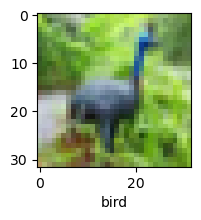

In [12]:
plot_sample(x_train , y_train,6)

# Preprocessing

In [13]:
#pixel values ranges from 0 to 255 so divide by 255
x_train= x_train/255
x_test= x_test/255

# Model building and Training

# ANN (Artificial Neural Network)

In [20]:
ann= models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
       ])

ann.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy', #we use sparse_categorical_crossentropy because class 0 to 9 not only categorical because didnt did one hot encoding
                metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 58s 35ms/step - loss: 1.8118 - accuracy: 0.3565
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6255 - accuracy: 0.4238
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5395 - accuracy: 0.4588
Epoch 4/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4843 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4346 - accuracy: 0.4964


In [21]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.4533 - accuracy: 0.4816


[1.4533158540725708, 0.48159998655319214]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= ann.predict(x_test)
y_pred_classes= [np.argmax(element) for element in y_pred]

print('Classification Report: /n',classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 17ms/step
Classification Report: /n               precision    recall  f1-score   support

           0       0.49      0.59      0.54      1000
           1       0.67      0.49      0.57      1000
           2       0.36      0.38      0.37      1000
           3       0.37      0.33      0.35      1000
           4       0.43      0.44      0.43      1000
           5       0.37      0.40      0.38      1000
           6       0.61      0.39      0.47      1000
           7       0.54      0.56      0.55      1000
           8       0.51      0.70      0.59      1000
           9       0.56      0.53      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



# CNN (Convolutional Neural Network )

In [28]:
cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
     
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Softmax because it will normalize probabilities
])

cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.4696 - accuracy: 0.4731
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1186 - accuracy: 0.6091
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9815 - accuracy: 0.6589
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9014 - accuracy: 0.6877
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8309 - accuracy: 0.7112
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7706 - accuracy: 0.7317
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7162 - accuracy: 0.7508
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6831 - accuracy: 0.7603
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6392 - accuracy: 0.7758
Epoch 10/10
1563/1563 [==============================] - 32s 21m

In [30]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9491 - accuracy: 0.6924


[0.9490850567817688, 0.6923999786376953]

In [40]:
y_pr= cnn.predict(x_test) #softmax; 0 to 1
y_pred_class= [np.argmax(element) for element in y_pr]

313/313 [==============================] - 4s 14ms/step


In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

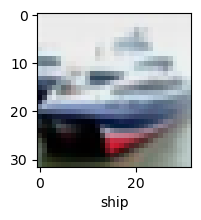

In [42]:
y_test = y_test.reshape(-1,)
plot_sample(x_test, y_test,1)   #actual value

In [43]:
classes[y_pred_class[1]]      #predicted value

'ship'

Actual value = Predicted Value

In [44]:
print('Classification Report: /n',classification_report(y_test, y_pred_class))

Classification Report: /n               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.82      0.82      0.82      1000
           2       0.77      0.37      0.50      1000
           3       0.51      0.52      0.52      1000
           4       0.52      0.77      0.62      1000
           5       0.64      0.57      0.60      1000
           6       0.72      0.81      0.76      1000
           7       0.71      0.78      0.74      1000
           8       0.80      0.78      0.79      1000
           9       0.77      0.81      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



# Comparing ANN and CNN

CNN (Convolutional Neural Network )has highest accuracy with 69%. We can conclude that CNN would be better choice for doing Image Classification as compared to ANN.